# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Analysis:

Temperature very strongly correlates with latitude for each hemisphere.  The r-squared value for the northern hemisphere is roughly -.9 and roughly .7 for the southern hemisphere.  In short, as you get closer to the equator, temperature increases.  

This correlation is not present for the other variables: humidity, wind speed, and cloudiness.  The r-squared values for these variables all fall below positive or negative .3, suggesting that these variables do not depend on latitude.

Cloudiness data is highly subjective, as it is not subject to precise measurements like the other data.  In other words, cloudiness cannot be measured with precision, so the data points tend to cluster around convenient measurements, which is why the scatter plots for this variable appear to have concentrated lines.

(Note: I wrote my analysis paragraphs before I changed the path for the api keys so that they would be outside of the repo.  I then reran the code to make sure that it would still work.  Doing so changed the r-values slightly, as new cities were used.  However, the overall trends still exist, though the southern hemisphere temperature/latitude correlation isn't as strong in this iteration.)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys

sys.path.insert(0, "/Users/jsimp/Desktop/Keys")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
base_url = f"{url}appid={weather_api_key}&units={units}&q="
lat = []
lng = []
temp = []
cloud = []
wind = []
country = []
date = []
humidity = []
name = []

print("Beginning Data Retrieval")
print("-----------------------------")

for city, x in zip(cities, range(1, len(cities)+1)):
    
    try:
        print(f"Processing Record {x} of {len(cities)} | {city}")
        response = requests.get(base_url+city).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        name.append(response["name"])
    except (KeyError, IndexError):
        print(f"{city} not found. Skipping...")
    

        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 626 | katsuura
Processing Record 2 of 626 | punta arenas
Processing Record 3 of 626 | albany
Processing Record 4 of 626 | ancud
Processing Record 5 of 626 | port elizabeth
Processing Record 6 of 626 | mataura
Processing Record 7 of 626 | port alfred
Processing Record 8 of 626 | estelle
Processing Record 9 of 626 | nikolskoye
Processing Record 10 of 626 | muscle shoals
Processing Record 11 of 626 | taolanaro
taolanaro not found. Skipping...
Processing Record 12 of 626 | sioux lookout
Processing Record 13 of 626 | karasburg
Processing Record 14 of 626 | yellowknife
Processing Record 15 of 626 | puerto ayora
Processing Record 16 of 626 | breyten
Processing Record 17 of 626 | cody
Processing Record 18 of 626 | vaini
Processing Record 19 of 626 | atuona
Processing Record 20 of 626 | udimskiy
Processing Record 21 of 626 | orapa
Processing Record 22 of 626 | rikitea
Processing Record 23 of 626 | hobart
Processing Re

Processing Record 192 of 626 | caceres
Processing Record 193 of 626 | husavik
Processing Record 194 of 626 | edd
Processing Record 195 of 626 | ambatofinandrahana
Processing Record 196 of 626 | port arthur
Processing Record 197 of 626 | saldanha
Processing Record 198 of 626 | salalah
Processing Record 199 of 626 | vila franca do campo
Processing Record 200 of 626 | khatanga
Processing Record 201 of 626 | san isidro
Processing Record 202 of 626 | barentsburg
barentsburg not found. Skipping...
Processing Record 203 of 626 | dudinka
Processing Record 204 of 626 | golden gate
Processing Record 205 of 626 | upernavik
Processing Record 206 of 626 | amderma
amderma not found. Skipping...
Processing Record 207 of 626 | ercis
Processing Record 208 of 626 | grand river south east
grand river south east not found. Skipping...
Processing Record 209 of 626 | le vauclin
Processing Record 210 of 626 | samusu
samusu not found. Skipping...
Processing Record 211 of 626 | wilmington
Processing Record 212

Processing Record 382 of 626 | bintulu
Processing Record 383 of 626 | juan aldama
Processing Record 384 of 626 | plettenberg bay
Processing Record 385 of 626 | luderitz
Processing Record 386 of 626 | aswan
Processing Record 387 of 626 | arlit
Processing Record 388 of 626 | saint anthony
Processing Record 389 of 626 | baijiantan
Processing Record 390 of 626 | jalu
Processing Record 391 of 626 | severo-kurilsk
Processing Record 392 of 626 | ha giang
Processing Record 393 of 626 | otane
Processing Record 394 of 626 | tiznit
Processing Record 395 of 626 | beringovskiy
Processing Record 396 of 626 | makakilo city
Processing Record 397 of 626 | karaul
karaul not found. Skipping...
Processing Record 398 of 626 | hamamatsu
Processing Record 399 of 626 | kabare
Processing Record 400 of 626 | jiddah
jiddah not found. Skipping...
Processing Record 401 of 626 | oistins
Processing Record 402 of 626 | gat
Processing Record 403 of 626 | constitucion
Processing Record 404 of 626 | pidhaytsi
Processing

Processing Record 574 of 626 | luba
Processing Record 575 of 626 | kosh-agach
Processing Record 576 of 626 | baykit
Processing Record 577 of 626 | vostok
Processing Record 578 of 626 | ritchie
Processing Record 579 of 626 | high level
Processing Record 580 of 626 | luebo
Processing Record 581 of 626 | maldonado
Processing Record 582 of 626 | comodoro rivadavia
Processing Record 583 of 626 | collierville
Processing Record 584 of 626 | coxim
Processing Record 585 of 626 | columbia
Processing Record 586 of 626 | nioro
Processing Record 587 of 626 | praia da vitoria
Processing Record 588 of 626 | manutuke
Processing Record 589 of 626 | cedeno
Processing Record 590 of 626 | tougue
Processing Record 591 of 626 | simao
Processing Record 592 of 626 | hearst
Processing Record 593 of 626 | kirakira
Processing Record 594 of 626 | doctor pedro p. pena
doctor pedro p. pena not found. Skipping...
Processing Record 595 of 626 | frutal
Processing Record 596 of 626 | warrnambool
Processing Record 597 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({
    "City":name,
    "Country":country,
    "Latitude":lat,
    "Longitude":lng,
    "Temperature (F)":temp,
    "Humidity (%)":humidity,
    "Wind Speed (mph)":wind,
    "Cloudiness (%)":cloud,
    "Date":date})

weather_data

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%),Date
0,Katsuura,JP,35.13,140.30,57.99,71,3.00,4,1587236976
1,Punta Arenas,CL,-53.15,-70.92,55.40,43,17.22,57,1587236976
2,Albany,US,42.60,-73.97,44.01,66,1.99,98,1587236865
3,Ancud,CL,-41.87,-73.82,60.80,82,14.99,75,1587236976
4,Port Elizabeth,ZA,-33.92,25.57,68.00,94,9.17,3,1587236977
...,...,...,...,...,...,...,...,...,...
568,Boca do Acre,BR,-8.75,-67.40,89.17,34,5.03,26,1587237097
569,San Antonio,US,29.42,-98.49,62.01,72,8.05,90,1587236872
570,Pemangkat,ID,1.17,108.97,76.10,89,6.85,79,1587237098
571,Caucaia,BR,-3.74,-38.65,86.00,62,8.05,40,1587237098


In [5]:
weather_data.to_csv("../output_data/weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
weather_data["Humidity (%)"].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = weather_data.loc[weather_data["Humidity (%)"] > 99, :]
humid_index = []
humid_index.append(humid_cities.index.unique())
humid_index

[Int64Index([233, 320, 328, 342, 348, 460, 474], dtype='int64')]

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
for index in humid_index:
    clean_city_data = weather_data.drop(index=index, inplace=False)
clean_city_data

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%),Date
0,Katsuura,JP,35.13,140.30,57.99,71,3.00,4,1587236976
1,Punta Arenas,CL,-53.15,-70.92,55.40,43,17.22,57,1587236976
2,Albany,US,42.60,-73.97,44.01,66,1.99,98,1587236865
3,Ancud,CL,-41.87,-73.82,60.80,82,14.99,75,1587236976
4,Port Elizabeth,ZA,-33.92,25.57,68.00,94,9.17,3,1587236977
...,...,...,...,...,...,...,...,...,...
568,Boca do Acre,BR,-8.75,-67.40,89.17,34,5.03,26,1587237097
569,San Antonio,US,29.42,-98.49,62.01,72,8.05,90,1587236872
570,Pemangkat,ID,1.17,108.97,76.10,89,6.85,79,1587237098
571,Caucaia,BR,-3.74,-38.65,86.00,62,8.05,40,1587237098


In [9]:
# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/clean_city_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

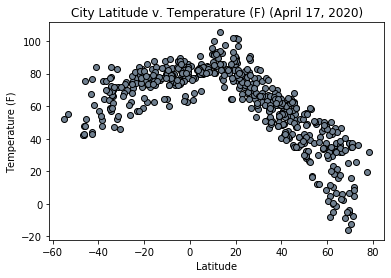

In [10]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Temperature (F)"], marker="o", facecolors="slategrey", edgecolors="black")
plt.title("City Latitude v. Temperature (F) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("../output_data/lat_temp_all.png")

This code is analyzing the relationship between temperature and latitude, plotting the values in the Latitude column and the Temperature column from the clean weather dataframe.  The graph shows that temperature increases as you approach the equator (latitude of 0).  This data appears to have a pretty strong correlation.  

## Latitude vs. Humidity Plot

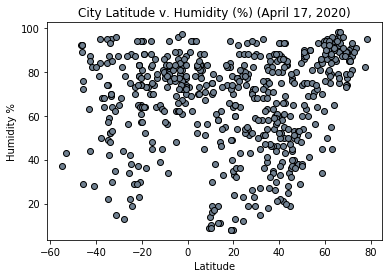

In [11]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity (%)"], marker="o", facecolors="slategrey", edgecolors="black")
plt.title("City Latitude v. Humidity (%) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.savefig("../output_data/lat_hum_all.png")

This code analyzes the relationship between latitude and humidity, plotting the values in the Latitude column and the Humidity column from the clean weather dataframe.  There is little correlation between the two.  As the graph shows, high humidity occurs at all latitudes.

## Latitude vs. Cloudiness Plot

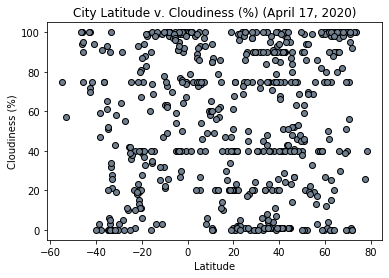

In [12]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness (%)"], marker="o", facecolors="slategrey", edgecolors="black")
plt.title("City Latitude v. Cloudiness (%) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lat_cloud_all.png")

This code analyzes the relationship between latitude and cloudiness, plotting the values in the Latitude column and the Cloudiness column from the clean weather dataframe.  There is little correlation between the two.  Also, you can tell that the data points are somewhat arbitrary, in that they cluster along convienent points, e.g. 20%, 40%, multiples of fives.

## Latitude vs. Wind Speed Plot

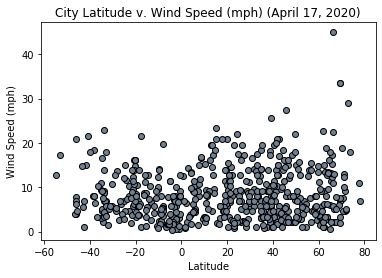

In [13]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed (mph)"], marker="o", facecolors="slategrey", edgecolors="black")
plt.title("City Latitude v. Wind Speed (mph) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/lat_wind_all.png")

This code analyzes the relationship between latitude and wind speed, plotting the values in the Latitude column and the Wind Speed column from the clean weather dataframe.  There is little correlation between the two.  

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
def line_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x * slope + intercept
    plt.plot(x_values, regress_values, "r-")
    plt.legend([line_eq + "\nr-squared = " + str(round(rvalue, 2))])
    print(line_eq)
    print("The r-squared value is " + str(round(rvalue, 2)))

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_city = clean_city_data.loc[(clean_city_data["Latitude"]) >= 0, :]
southern_city = clean_city_data.loc[(clean_city_data["Latitude"]) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.1x + 98.41
The r-squared value is -0.87


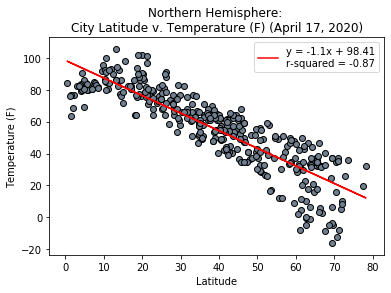

In [16]:
x_values = northern_city["Latitude"]
y_values = northern_city["Temperature (F)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Northern Hemisphere: \nCity Latitude v. Temperature (F) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("../output_data/lat_temp_nor.png")

This code analyzes the relationship between latitude and temperature in the northern hemisphere, plotting the values in the Latitude column and the Temperature column from the northern hemisphere dataframe.  Like the data from the entire planet, this has a very strong correlation as well. The r-squared value is -.90, which is very high. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.52x + 83.3
The r-squared value is 0.65


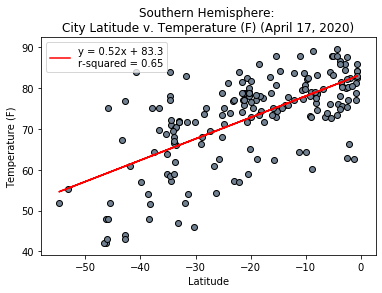

In [17]:
x_values = southern_city["Latitude"]
y_values = southern_city["Temperature (F)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Southern Hemisphere: \nCity Latitude v. Temperature (F) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("../output_data/lat_temp_sou.png")

This code analyzes the relationship between latitude and temperature in the southern hemisphere, plotting the values in the Latitude column and the Temperature column from the southern hemisphere dataframe.  Like the data from the entire planet and northern hemisphere, this has a very strong correlation as well.  The correlation with an r-squared value of .71 is slightly less than the northern hemisphere data, which could be due, in part, to the smaller sample size of the data.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.37x + 51.75
The r-squared value is 0.32


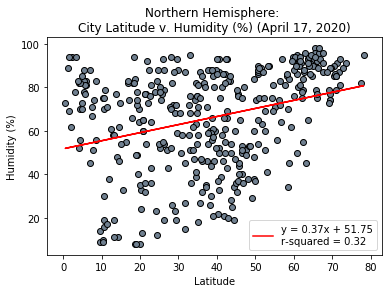

In [18]:
x_values = northern_city["Latitude"]
y_values = northern_city["Humidity (%)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Northern Hemisphere: \nCity Latitude v. Humidity (%) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../output_data/lat_hum_nor.png")

This code analyzes the relationship between latitude and humidity in the northern hemisphere, plotting the values in the Latitude column and the Humidity column from the northern hemisphere dataframe.  These two factors have very little correlation with an r-squared value of .24.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.29x + 75.28
The r-squared value is 0.21


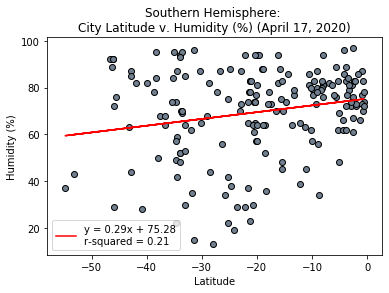

In [19]:
x_values = southern_city["Latitude"]
y_values = southern_city["Humidity (%)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Southern Hemisphere: \nCity Latitude v. Humidity (%) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../output_data/lat_hum_sou.png")

This code analyzes the relationship between latitude and humidity in the southern hemisphere, plotting the values in the Latitude column and the Humidity column from the southern hemisphere dataframe.  These two factors have very little correlation with an r-squared value of .16.  

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.18x + 47.82
The r-squared value is 0.1


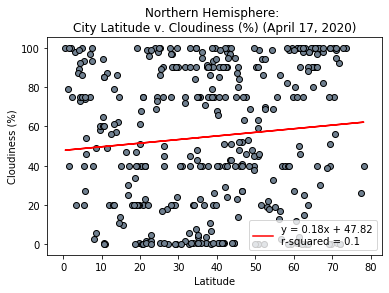

In [20]:
x_values = northern_city["Latitude"]
y_values = northern_city["Cloudiness (%)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Northern Hemisphere: \nCity Latitude v. Cloudiness (%) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/lat_cloud_nor.png")

This code analyzes the relationship between latitude and cloudiness in the northern hemisphere, plotting the values in the Latitude column and the Cloudiness column from the northern hemisphere dataframe.  These two factors have very little correlation with an r-squared value of .22.    

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.68x + 70.0
The r-squared value is 0.27


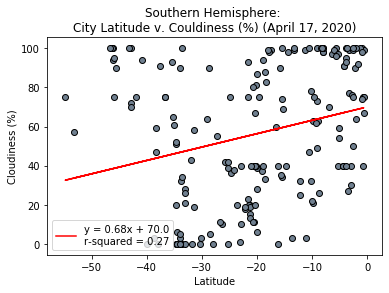

In [21]:
x_values = southern_city["Latitude"]
y_values = southern_city["Cloudiness (%)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Southern Hemisphere: \nCity Latitude v. Couldiness (%) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../output_data/lat_cloud_sou.png")

This code analyzes the relationship between latitude and cloudiness in the southern hemisphere, plotting the values in the Latitude column and the Cloudiness column from the southern hemisphere dataframe.  These two factors have very little correlation with an r-squared value of .1.    

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.02x + 7.96
The r-squared value is 0.06


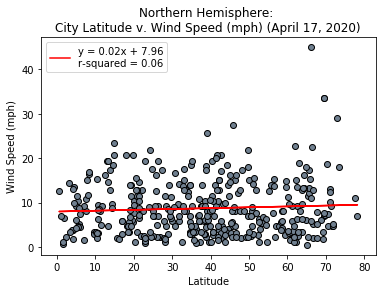

In [22]:
x_values = northern_city["Latitude"]
y_values = northern_city["Wind Speed (mph)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Northern Hemisphere: \nCity Latitude v. Wind Speed (mph) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/lat_wind_nor.png")

This code analyzes the relationship between latitude and wind speed in the northern hemisphere, plotting the values in the Latitude column and the Wind Speed column from the northern hemisphere dataframe.  These two factors have very little correlation with an r-squared value of .18.    

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.11x + 5.21
The r-squared value is -0.31


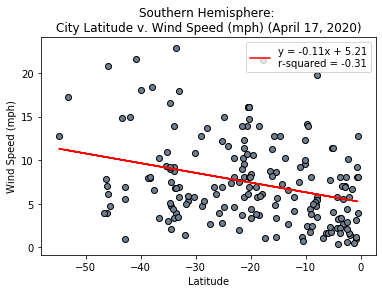

In [23]:
x_values = southern_city["Latitude"]
y_values = southern_city["Wind Speed (mph)"]

line_reg(x_values,y_values)

plt.scatter(x_values, y_values, marker="o", facecolors="slategrey", edgecolors="black")
plt.title("Southern Hemisphere: \nCity Latitude v. Wind Speed (mph) (April 17, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../output_data/lat_wind_sou.png")

This code analyzes the relationship between latitude and wind speed in the southern hemisphere, plotting the values in the Latitude column and the Wind Speed column from the southern hemisphere dataframe.  These two factors have very little correlation with an r-squared value of -.3.    